In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
application = pd.read_csv("application_record.csv")
pagamentos = pd.read_csv("modulo19data.csv")

In [3]:
application.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [4]:
pagamentos["STATUS"]

0        BOM
1        BOM
2        BOM
3        BOM
4        BOM
        ... 
16645    BOM
16646    BOM
16647    BOM
16648    BOM
16649    MAU
Name: STATUS, Length: 16650, dtype: object

In [5]:
pagamentos["STATUS"] = pagamentos["STATUS"].replace({"BOM" : 1, "MAU": 0})
pagamento = pagamentos[["ID", "STATUS"]].copy()

In [6]:
application = pd.merge(application, pagamento, on="ID", how="inner")

In [7]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,1
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,5149042,F,N,Y,0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19750,-3608,1,0,0,0,Laborers,2.0,1
16646,5149056,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,1,0,NaN,2.0,1
16647,5149145,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,1
16648,5149158,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,1


In [8]:
application.drop(columns="FLAG_MOBIL", inplace=True)

In [9]:
application["CODE_GENDER"] = application["CODE_GENDER"].replace({"M": 0, "F": 1}).astype("int16")
application["FLAG_OWN_CAR"] = application["FLAG_OWN_CAR"].replace({"N": 0, "Y": 1}).astype("int16")
application["FLAG_OWN_REALTY"] = application["FLAG_OWN_REALTY"].replace({"N": 0, "Y": 1}).astype("int16")
application["FLAG_WORK_PHONE"] = application["FLAG_WORK_PHONE"].replace({"N": 0, "Y": 1}).astype("int16")
application["FLAG_PHONE"] = application["FLAG_PHONE"].replace({"N": 0, "Y": 1}).astype("int16")
application["FLAG_EMAIL"] = application["FLAG_EMAIL"].replace({"N": 0, "Y": 1}).astype("int16")

In [10]:
application.dropna(inplace=True, subset=["FLAG_EMAIL", "FLAG_PHONE", "FLAG_WORK_PHONE"])

In [11]:
application.nunique()

ID                     16650
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               8
AMT_INCOME_TOTAL         221
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              5298
DAYS_EMPLOYED           3005
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS            9
STATUS                     2
dtype: int64

In [12]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16650 entries, 0 to 16649
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16650 non-null  int64  
 1   CODE_GENDER          16650 non-null  int16  
 2   FLAG_OWN_CAR         16650 non-null  int16  
 3   FLAG_OWN_REALTY      16650 non-null  int16  
 4   CNT_CHILDREN         16650 non-null  int64  
 5   AMT_INCOME_TOTAL     16650 non-null  float64
 6   NAME_INCOME_TYPE     16650 non-null  object 
 7   NAME_EDUCATION_TYPE  16650 non-null  object 
 8   NAME_FAMILY_STATUS   16650 non-null  object 
 9   NAME_HOUSING_TYPE    16650 non-null  object 
 10  DAYS_BIRTH           16650 non-null  int64  
 11  DAYS_EMPLOYED        16650 non-null  int64  
 12  FLAG_WORK_PHONE      16650 non-null  int16  
 13  FLAG_PHONE           16650 non-null  int16  
 14  FLAG_EMAIL           16650 non-null  int16  
 15  OCCUPATION_TYPE      11405 non-null 

In [13]:
application[["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]]

,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,Working,Secondary / secondary special,Married,House / apartment
1,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
2,Commercial associate,Secondary / secondary special,Single / not married,House / apartment
3,Working,Higher education,Married,House / apartment
4,Working,Incomplete higher,Married,House / apartment
...,...,...,...,...
16645,Working,Secondary / secondary special,Civil marriage,House / apartment
16646,Commercial associate,Secondary / secondary special,Married,House / apartment
16647,Working,Secondary / secondary special,Married,House / apartment
16648,Working,Secondary / secondary special,Married,House / apartment


In [14]:
dummies = pd.get_dummies(data=application,
               columns=["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"],
               dtype="int16")


In [15]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16650 entries, 0 to 16649
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 16650 non-null  int64  
 1   CODE_GENDER                                        16650 non-null  int16  
 2   FLAG_OWN_CAR                                       16650 non-null  int16  
 3   FLAG_OWN_REALTY                                    16650 non-null  int16  
 4   CNT_CHILDREN                                       16650 non-null  int64  
 5   AMT_INCOME_TOTAL                                   16650 non-null  float64
 6   DAYS_BIRTH                                         16650 non-null  int64  
 7   DAYS_EMPLOYED                                      16650 non-null  int64  
 8   FLAG_WORK_PHONE                                    16650 non-null  int16  
 9   FLAG_P

In [16]:
dummies.drop(columns="OCCUPATION_TYPE", inplace=True)

In [17]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16650 entries, 0 to 16649
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 16650 non-null  int64  
 1   CODE_GENDER                                        16650 non-null  int16  
 2   FLAG_OWN_CAR                                       16650 non-null  int16  
 3   FLAG_OWN_REALTY                                    16650 non-null  int16  
 4   CNT_CHILDREN                                       16650 non-null  int64  
 5   AMT_INCOME_TOTAL                                   16650 non-null  float64
 6   DAYS_BIRTH                                         16650 non-null  int64  
 7   DAYS_EMPLOYED                                      16650 non-null  int64  
 8   FLAG_WORK_PHONE                                    16650 non-null  int16  
 9   FLAG_P

In [18]:
dummies_sample = dummies.sample(10000)
dummies_sample

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
2884,5029096,0,1,1,2,135000.0,-11564,-2944,0,0,...,1,0,0,0,0,1,0,0,0,0
3612,5036340,1,1,1,0,225000.0,-19949,365243,0,0,...,1,0,0,0,0,1,0,0,0,0
11025,5096790,1,0,1,0,67500.0,-20371,365243,0,0,...,1,0,0,0,0,1,0,0,0,0
8991,5087824,0,0,1,2,112500.0,-15788,-1563,0,0,...,1,0,0,0,0,1,0,0,0,0
81,5009053,1,0,1,2,202500.0,-10997,-2289,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15892,5148609,1,1,1,0,135000.0,-22800,365243,0,0,...,1,0,0,0,0,1,0,0,0,0
16366,5149945,1,0,1,0,180000.0,-22228,-686,1,1,...,1,0,0,0,0,1,0,0,0,0
10501,5093252,1,0,1,0,247500.0,-11914,-2980,0,0,...,1,0,0,0,0,1,0,0,0,0
2639,5028514,1,1,1,0,225000.0,-19724,-12591,0,0,...,1,0,0,0,0,1,0,0,0,0


In [19]:
y = dummies_sample.loc[:, "STATUS"]
x = dummies_sample.loc[:, ~dummies_sample.columns.isin(["STATUS"])]
dummies_sample["STATUS"].isna().sum()

0

In [20]:
#selected_columns = dummies2.columns[dummies2.columns != "STATUS"]
#selected_columns

In [21]:
clf = DecisionTreeClassifier(max_depth=6)

In [22]:
x.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartm

In [23]:
clf.fit(X=x.values, y=y.values)

DecisionTreeClassifier(max_depth=6)

[Text(0.5481770833333334, 0.9285714285714286, 'x[7] <= -1161.5\ngini = 0.023\nsamples = 10000\nvalue = [118, 9882]'),
 Text(0.3359375, 0.7857142857142857, 'x[13] <= 0.5\ngini = 0.015\nsamples = 6193\nvalue = [47, 6146]'),
 Text(0.2552083333333333, 0.6428571428571429, 'x[16] <= 0.5\ngini = 0.015\nsamples = 6190\nvalue = [46, 6144]'),
 Text(0.15625, 0.5, 'x[4] <= 3.5\ngini = 0.023\nsamples = 2367\nvalue = [27, 2340]'),
 Text(0.08333333333333333, 0.35714285714285715, 'x[0] <= 5038796.0\ngini = 0.022\nsamples = 2360\nvalue = [26, 2334]'),
 Text(0.041666666666666664, 0.21428571428571427, 'x[24] <= 0.5\ngini = 0.004\nsamples = 548\nvalue = [1, 547]'),
 Text(0.020833333333333332, 0.07142857142857142, 'gini = 0.0\nsamples = 512\nvalue = [0, 512]'),
 Text(0.0625, 0.07142857142857142, 'gini = 0.054\nsamples = 36\nvalue = [1, 35]'),
 Text(0.125, 0.21428571428571427, 'x[0] <= 5038825.0\ngini = 0.027\nsamples = 1812\nvalue = [25, 1787]'),
 Text(0.10416666666666667, 0.07142857142857142, 'gini = 0.0\

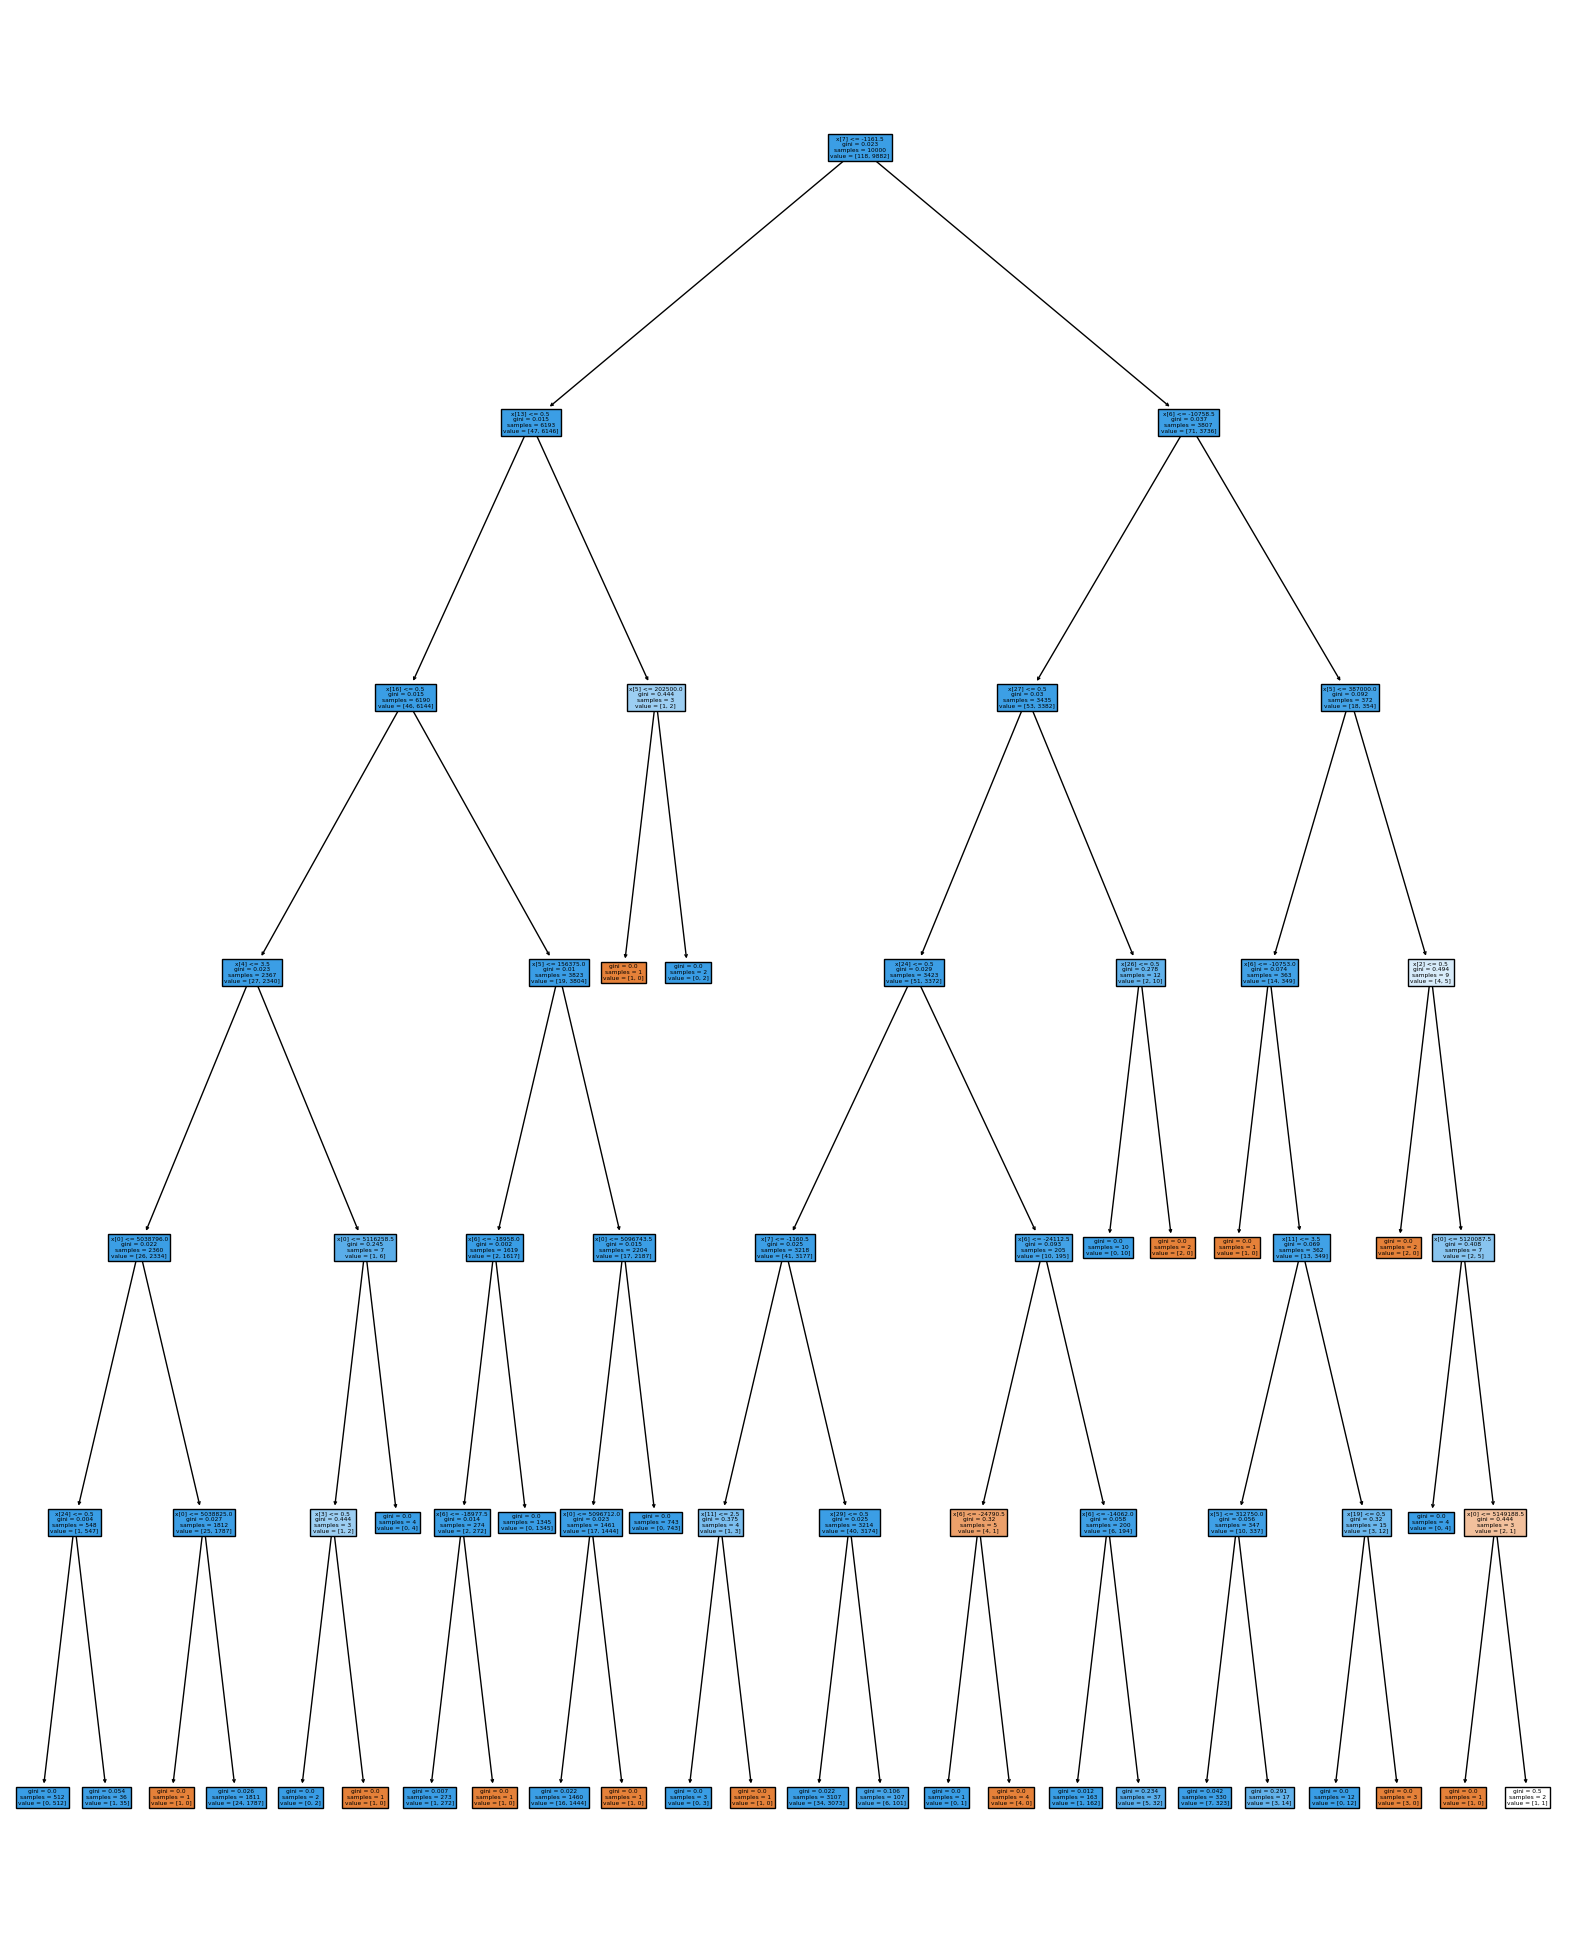

In [24]:
plt.figure(figsize=(20, 25))
plot_tree(clf, filled=True)

In [25]:
w = dummies_sample.loc[:, ~dummies_sample.columns.isin(["STATUS"])]
w

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
2884,5029096,0,1,1,2,135000.0,-11564,-2944,0,0,...,1,0,0,0,0,1,0,0,0,0
3612,5036340,1,1,1,0,225000.0,-19949,365243,0,0,...,1,0,0,0,0,1,0,0,0,0
11025,5096790,1,0,1,0,67500.0,-20371,365243,0,0,...,1,0,0,0,0,1,0,0,0,0
8991,5087824,0,0,1,2,112500.0,-15788,-1563,0,0,...,1,0,0,0,0,1,0,0,0,0
81,5009053,1,0,1,2,202500.0,-10997,-2289,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15892,5148609,1,1,1,0,135000.0,-22800,365243,0,0,...,1,0,0,0,0,1,0,0,0,0
16366,5149945,1,0,1,0,180000.0,-22228,-686,1,1,...,1,0,0,0,0,1,0,0,0,0
10501,5093252,1,0,1,0,247500.0,-11914,-2980,0,0,...,1,0,0,0,0,1,0,0,0,0
2639,5028514,1,1,1,0,225000.0,-19724,-12591,0,0,...,1,0,0,0,0,1,0,0,0,0


In [26]:
clf.predict(X=w.values)

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
right = 0
till = 5000

for i in range(till):
    w = dummies.loc[i, ~dummies.columns.isin(["STATUS"])]
    if clf.predict(X=[w.values]) == dummies.loc[i, "STATUS"]:
        right += 1

print(right/till)

0.9956


In [33]:
dummies.to_csv("application_clean.csv")